<h4> Zadanie1: Jak sprawdzić czy zadany ciąg tekstowy jest liczbą? Przykładowo '1', '12.3', '50,25' uznajemy za liczby, a '1a' już nie. Napisz odpowiednią funkcję, która zwraca wartość logiczną True lub False.

In [134]:
def is_number(text):
    import string
    list_text = list(text)

    # Filtracja: jeżeli nie zaczyna się od cyfry albo , . + - to nie jest liczbą
    if list_text[0] in string.digits or text[0] in [",",".","+","-"]:

        # Usuń +/-
        if list_text[0] in ["+","-"]:
            list_text.remove(list_text[0])

        # Sprawdz czy występuje max 1 "," lub "." i usuń ją    
        if list_text.count(".") <= 1 or list_text.count(",") <= 1:
            if "." in list_text: list_text.remove(".")
            elif "," in list_text: list_text.remove(",")
        else:                    
            return False
        
        # Sprawdź czy wszystkie pozostałe to cyfry
        if all(e.isdigit() for e in list_text):
            return True

    else:                    
        return False

# Test: z listy x zapisz wszystkie liczby do listy nums
x= ["0.1",  ".2", "9,3", ",555",  "+0.5623", "-.5" ,"56666.34" , "543929", ".,4", "++5", "5,,,5", "jdjdj1", "111j1", "55+5"]
nums =[]

for num in x:
    if is_number(num):
        nums.append(num)
        
print(nums)

['0.1', '.2', '9,3', ',555', '+0.5623', '-.5', '56666.34', '543929']


<h4> Zadanie2: Wyświetl wszystkie konteksty słowa $death$.

In [135]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.text import Text

file = open('example_text.txt','r')  
text = file.read().replace('\n','')
file.close()

txt_words = word_tokenize(text)
txt_words = [word.lower() for word in txt_words] 

t = Text(txt_words) 

print(t.concordance('death'))

Displaying 6 of 6 matches:
hen hindus , at places where , after death , their remains may without difficul
teristic marks of leprosy , and that death took place seven years afterwards . 
this stage for years , and even till death of the patient , or the disease adva
s look older than they usually are . death generally takes place from diarrha a
e not leprous . after her husband 's death she came to live with her brother , 
n returned home after her husband 's death he had not seen a leper in that vill
None


<h4> Zadanie3: Narysuj analogiczny wykres jak wyżej, z tym że tym razem nie uwzględniaj stop words, znaków interpunkcyjnych i liczb. Zapisz te wybrane tokeny do listy o nazwie  filtered_words .

In [136]:
#funkcja sprawdzająca czy string jest znakiem interpunkcyjnym lub "..."
def is_punctiation(text):
    if text in string.punctuation or text == "...":
        return True
    else:
        return False

<Axes: title={'center': 'Rozkład występowania 30 najpopularniejszych tokenów'}, xlabel='Samples', ylabel='Counts'>

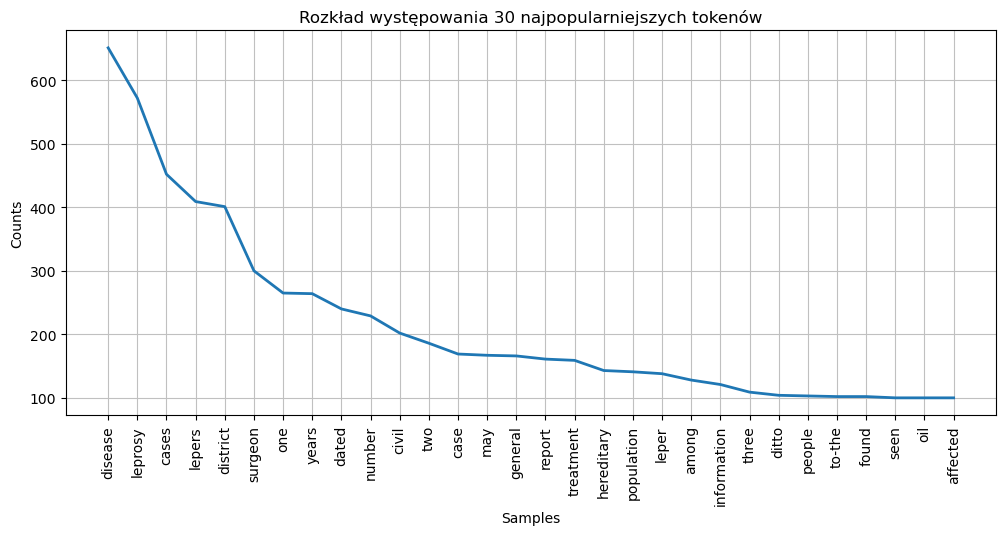

In [137]:
import string
from nltk.probability import FreqDist
from nltk.corpus import stopwords

stop_words =  set(stopwords.words("english"))

filtered_words = [word for word in txt_words if not is_punctiation(word)
                  and word not in stop_words and not is_number(word)]

fdist_filtered = FreqDist(filtered_words) #zliczam wystepowanie slow
fdist_filtered.plot(30,title='Rozkład występowania 30 najpopularniejszych tokenów') 

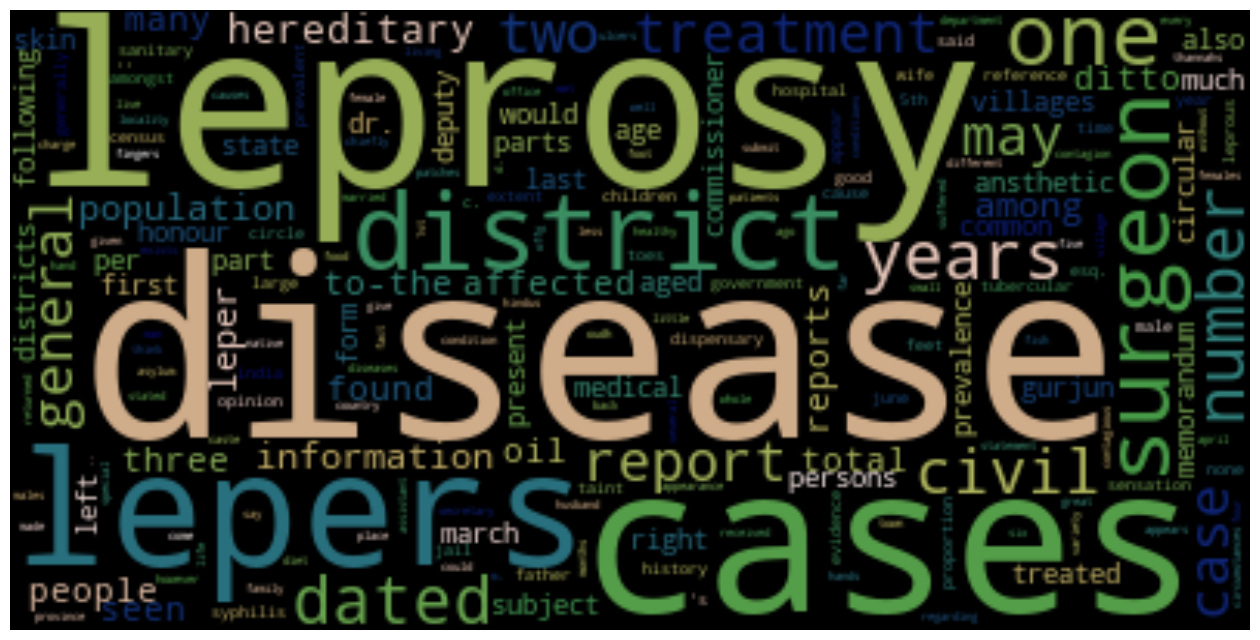

In [138]:
#World Cloud dla wyczyszczonych słów

import matplotlib.pyplot as plt
from wordcloud import WordCloud 

cloud = WordCloud(max_font_size=80,colormap="gist_earth").generate_from_frequencies(fdist_filtered)
plt.figure(figsize=(16,12)) #wymiar
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h4> Zadanie4: Wykonaj analogiczną analize jak wyżej, z tym że nie bierz pod uwagę stop words, znaków interpunkcyjnych ani liczb przy szukaniu kolokacji.

In [139]:
from nltk.collocations import BigramAssocMeasures
from nltk.collocations import BigramCollocationFinder

#kolokacje 

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(filtered_words , 5) #okno 5 słów miedzy slowami

finder.apply_freq_filter(10) #10 takich słów

finder.nbest(bigram_measures.likelihood_ratio, 15) #pierwsze 15 wynikow

[('ditto', 'ditto'),
 ('civil', 'surgeon'),
 ('gurjun', 'oil'),
 ('surgeon', 'general'),
 ('deputy', 'circle'),
 ('deputy', 'general'),
 ('years', 'years'),
 ('number', 'lepers'),
 ('sanitary', 'commissioner'),
 ('deputy', 'surgeon'),
 ('general', 'circle'),
 ('surgeon', 'circle'),
 ('circular', 'memorandum'),
 ('hereditary', 'taint'),
 ('m.', 'd.')]

In [140]:
# przygotowanie tekstu inaugural

#nltk.download('inaugural')
from nltk.corpus import inaugural #przemowy prezydenckie
inaugural.readme().replace('\n', ' ') 

from nltk.corpus import inaugural #posłużymy sie korpusem inaugural
from nltk.text import Text

<h4> Zadanie5: Przeanalizuj ponownie korpus  inaugural. <br>
    
    
- zapisz wszystkie tokeny z wszystkich dokumentów do jednej listy ($inaugural\_tokens=inaugural.words()$)

- zmień wszystkie litery na małe

In [141]:
# Tworzenie i czyszczenie listy
# Usunełam też liczby, stopwords i interpunkcje, żeby było przejrzyście
inaugural_tokens = inaugural.words()
inaugural_tokens = [word.lower() for word in inaugural_tokens]
clean_inaugural_tokens = [word for word in inaugural_tokens if not is_punctiation(word) 
                          and not is_number(word) and word not in stop_words]
print(clean_inaugural_tokens)

['fellow', 'citizens', 'senate', 'house', 'representatives', 'among', 'vicissitudes', 'incident', 'life', 'event', 'could', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', 'received', '14th', 'day', 'present', 'month', 'one', 'hand', 'summoned', 'country', 'whose', 'voice', 'never', 'hear', 'veneration', 'love', 'retreat', 'chosen', 'fondest', 'predilection', 'flattering', 'hopes', 'immutable', 'decision', 'asylum', 'declining', 'years', '--', 'retreat', 'rendered', 'every', 'day', 'necessary', 'well', 'dear', 'addition', 'habit', 'inclination', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time', 'hand', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', 'could', 'overwhelm', 'despondence', 'one', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 'ought', 'peculi

- ile występuje unikatowych tokenów?

In [142]:
#Unikatowe tokeny
unique = set(clean_inaugural_tokens)

print(f"Number of unique tokens: {len(unique)}")

Number of unique tokens: 9244


- wyznacz 7 najczęstszych kolokacji występujących co najmniej 10 razy nie zawierających stop words, znaków interpunkcyjncyh, liczb (dopuszczamy okno 5)

In [143]:
#Kolokacje
from nltk.collocations import BigramAssocMeasures
from nltk.collocations import BigramCollocationFinder

#cel: szukamy slow ktore czesto wystepuja razem

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(clean_inaugural_tokens, 5) #dopuszczamy okno 5 slow miedzy slowami

finder.apply_freq_filter(10) #znajdz slowa ktore wystepuja ze sobą co najmniej 10 razy w tekscie

finder.nbest(bigram_measures.likelihood_ratio, 7) #pokaz pierwsze 15 wynikow


[('united', 'states'),
 ('fellow', 'citizens'),
 ('let', 'us'),
 ('thank', 'thank'),
 ('one', 'another'),
 ('men', 'women'),
 ('four', 'years')]


- wykonaj metode $nltk.pos\_tag$ na liście unikatowych tokenów i zapisz wyniki pod nazwą $tagged\_inaugural\_tokens$
zapisz do listy $nouns$ tylko te tokeny z $inaugural\_tokens$, które są rzeczownikami (tag NN lub NNs)

- jakie trzy rzeczowniki pojawiały się najczęściej?


In [144]:
# tagi dla unikatowych tokentów
from nltk.tag import pos_tag
tagged_inaugural_tokens = nltk.pos_tag(clean_inaugural_tokens)

nouns = []
for item in tagged_inaugural_tokens:
    if item[1] == "NN" or item[1]=="NNS":
        nouns.append(item[0])
print(f"Nouns: {nouns[:10]}")

# najczęstsze rzeczowniki
freq_nouns = FreqDist(nouns)
pop_nouns = [word for word, _ in freq_nouns.most_common(3)]
print(f"3 najczęstsze rzeczowniki {pop_nouns}")

Nouns: ['citizens', 'house', 'representatives', 'vicissitudes', 'life', 'event', 'anxieties', 'notification', 'order', 'day']
3 najczęstsze rzeczowniki ['government', 'people', 'world']



- narysuj wykres rozkładu tych trzech rzeczowników w kolejnych latach


<Axes: xlabel='Samples', ylabel='Counts'>

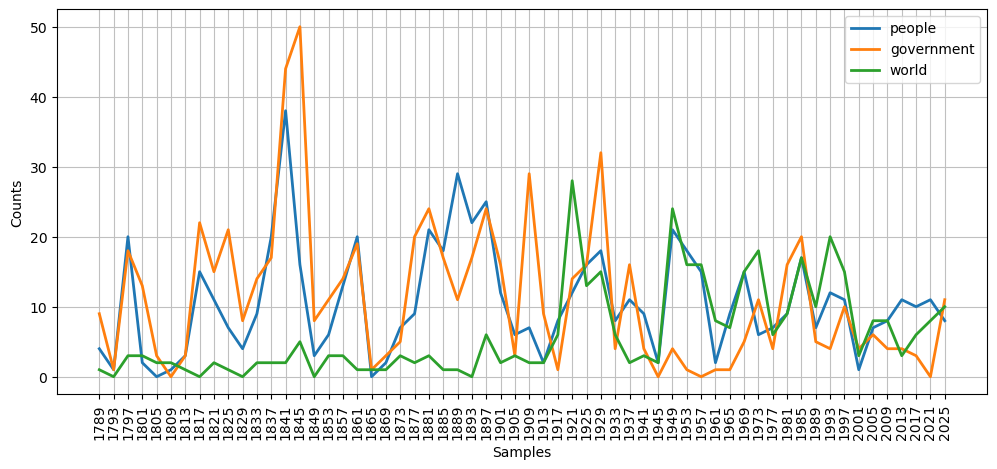

In [145]:
# wykres rozkładu

import nltk
from nltk.probability import ConditionalFreqDist
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 5) #wielkosc wykresu


targets= pop_nouns #ktore slowa sprawdzamy

cfd = nltk.ConditionalFreqDist((target, fileid[:4]) #fieleid[:4] jest po to zeby na rysnku pokazywal tylko pierwsze cztery znaki z nazwy (czyli rok)
    for fileid in inaugural.fileids() #dla kolejnych plikow
    for word in inaugural.words(fileid) #dla kolejnych slow w tych plikach
    for target in targets #dla kazdego slowa z listy zadanych przez nas
    if word.lower().startswith(target)) #czy slowo w tekscie zaczyna sie od naszego slowa targetu?
cfd.plot()


- narysuj wykres typu  wordcloud  dla wszystkich rzeczowników



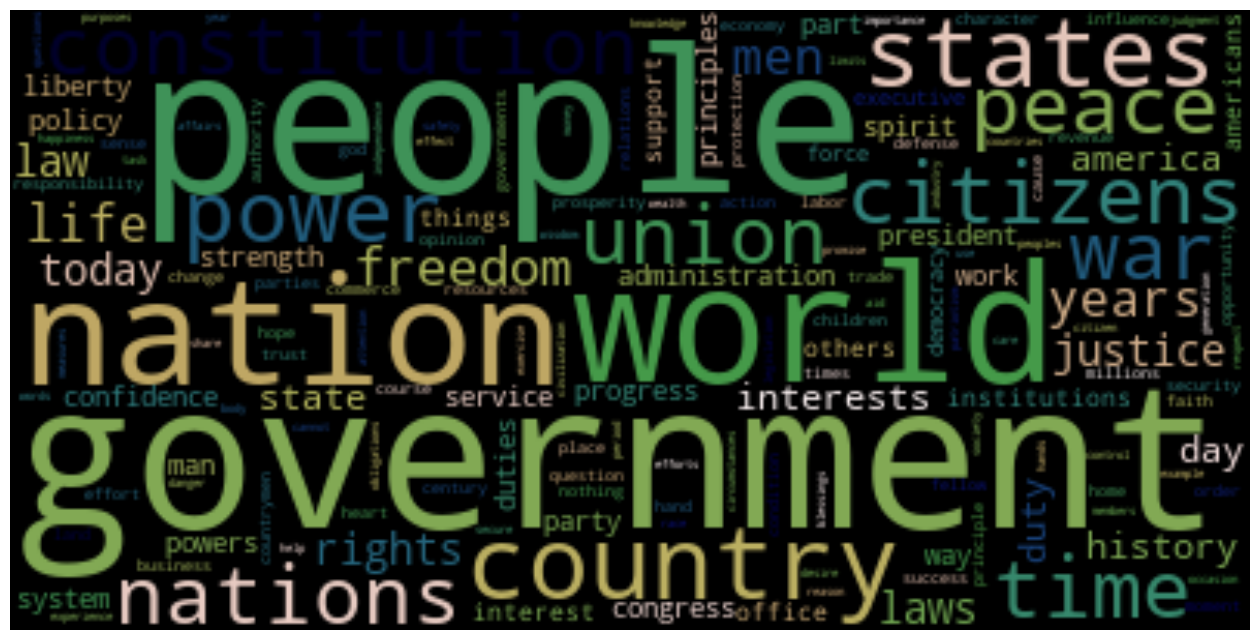

In [146]:
#wykres wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud 

cloud = WordCloud(max_font_size=80,colormap="gist_earth").generate_from_frequencies(freq_nouns)
plt.figure(figsize=(16,12)) #wymiar obrazka
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

- jakie trzy przymiotniki w stopniu wyższym i najwyższym występowały najczęściej we wszystkich przemowach? (tag JJR/JJS)


In [147]:
# tagi dla unikatowych tokentów
from nltk.tag import pos_tag
tagged_inaugural_tokens = nltk.pos_tag(clean_inaugural_tokens)

# lista przymiotników w stopniu wyższym i najwyższm
sup_adj = []
com_adj  =[]
for item in tagged_inaugural_tokens:
    if item[1] == "JJR":
        com_adj.append(item[0])
    if item[1] == "JJS":
        sup_adj.append(item[0])

freq_sup_adj = FreqDist(sup_adj)
freq_com_adj = FreqDist(com_adj)

sup3 = [word for word, number in freq_sup_adj.most_common(3)]
com3 = [word for word, number in freq_com_adj.most_common(3)]
print(f"3 Superlative: {sup3}, comparative adj: {com3}")

3 Superlative: ['best', 'greatest', 'highest'], comparative adj: ['greater', 'less', 'better']


In [148]:
# A TERAZ DODATKOWE JUST FOR FUN:)

# zauważyłam ze tagi są czasem błędnie przypisane
print("forest" in sup_adj)
print("consider" in com_adj)


True
True


In [149]:
# po sprawdzeniu słowo może mieć kilka różnych tagów
print([tag for word, tag in tagged_inaugural_tokens if word == "consider"])


# próba zidentyfikowania źle przypisanych przymiotników: kończy się na -est, -er i nie jest JJS/JJR
multiple_tags =[]
for (word, tag) in tagged_inaugural_tokens:
    list_word = list(word)
    if (tag != "JJS" and tag != "JJR") and (word[-3:] == "est" or word[-2:] == "er") :
        multiple_tags.append((word))
        

print(set(multiple_tags))
# Na oko większość zidentyfikowanych słów nie jest przymniotnikami.
# Jest to jednak uśrenienie metody i trzeba zadać sb pytanie, 
# czy odrzucenie ze zbioru słów innch niż przymotniki jest bardziej wartościowe 
# niż utrata omylnie zidentyfikowanych przymiotniów.
# Alternatywnym rozwiązaniem byłoby użycie biblioteki o lepszym modelu tagowania.
# Myślałam też o wyznaczeniun średniego błędu z dodadną wagą freqency, 
# ale do tego potrzbowałabym izdentyfikować wszystkie przymniotniki.

['VB', 'VB', 'JJR', 'VBP', 'VB', 'NN', 'VB', 'VBP', 'NN', 'VBP', 'VBP', 'VB', 'VB', 'VB', 'JJR', 'VBP', 'VB', 'NN', 'VB', 'VB', 'VBP']
{'volunteer', 'sternest', 'administer', 'graver', 'sumter', 'higher', 'wither', 'lesser', 'test', 'speaker', 'either', 'fairer', 'mother', 'fiber', 'upper', 'banner', 'toughest', 'truest', 'rest', 'producer', 'discover', 'distributer', 'refer', 'wander', 'earnest', 'nobler', 'plainer', 'render', 'planter', 'whisper', 'protest', 'flatterer', 'happier', 'wisest', 'foster', 'inner', 'older', 'number', 'enter', 'fullest', 'falter', 'former', 'fever', 'schoolmaster', 'quest', 'prosper', 'friendliest', 'moreover', 'harvest', 'border', 'brighter', 'smother', 'longer', 'earlier', 'whomsoever', 'tender', 'character', 'firefighter', 'preacher', 'wherever', 'deliver', 'manger', 'hereafter', 'differ', 'summer', 'sister', 'cleaner', 'harder', 'deepest', 'matter', 'specter', 'quieter', 'suggest', 'danger', 'altogether', 'manufacturer', 'voter', 'ruler', 'lawgiver', '

In [150]:
cleaned_sup_adj =[]
for word in sup_adj:
    if word not in multiple_tags:
      cleaned_sup_adj.append(word)

cleaned_com_adj =[]
for word in sup_adj:
    if word not in multiple_tags:
      cleaned_com_adj.append(word)

print(f"Długość sup przed wyczyszczeniem: {len(sup_adj)}, po {len(cleaned_sup_adj)} \nDługość com przed wyczyszczeniem: {len(com_adj)}, po {len(cleaned_com_adj)} \n ")
freq_sup_adj = FreqDist(cleaned_sup_adj)
freq_com_adj = FreqDist(cleaned_com_adj)

# jak widać najczestsze przymiotniki się nie zmieniły
sup3 = [word for word, number in freq_sup_adj.most_common(3)]
com3 = [word for word, number in freq_com_adj.most_common(3)]
print(f"3 Superlative: {sup3}, comparative adj: {com3}")

Długość sup przed wyczyszczeniem: 354, po 183 
Długość com przed wyczyszczeniem: 221, po 183 
 
3 Superlative: ['greatest', 'highest', 'least'], comparative adj: ['greatest', 'highest', 'least']



- zobacz jak wygląda rozkład występowania słowa  war  w całym korpusie (lexical dispersion plot)

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

<Figure size 1800x300 with 0 Axes>

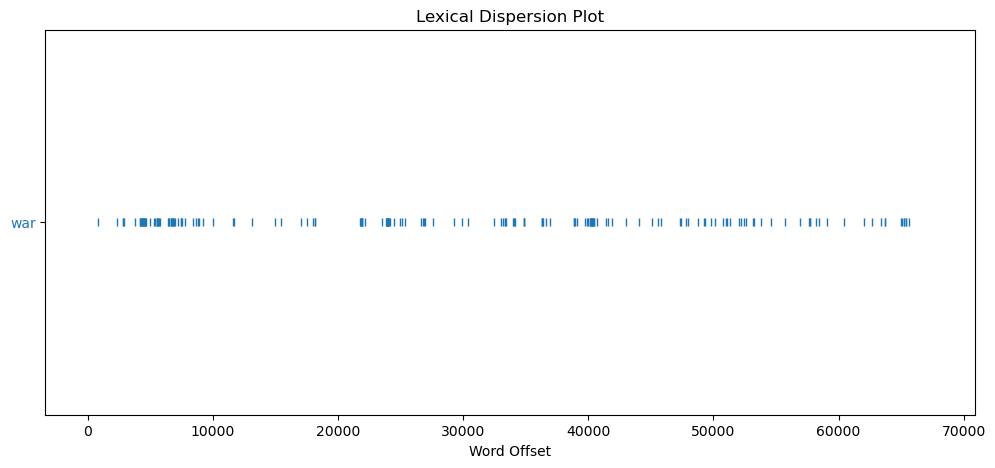

In [151]:
from nltk.draw.dispersion import dispersion_plot
import matplotlib.pyplot as plt

inaugural_tokens = Text(clean_inaugural_tokens)

plt.figure(figsize=(18, 3))
targets=['war']
dispersion_plot(inaugural_tokens, targets, ignore_case=True, title='Lexical Dispersion Plot')